# HW5
## Question 3
### part c

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import math

In [60]:
def y_0(x_in, a=1.0, L=2.0):
    x=x_in*L
    if np.any(x > L) | np.any(x < 0):
        print(f"Invalid input: {x} is not in range of [0,{L}]")
        return
    
    return np.where(x > L/2, (L-x)*2*a/L, x*2*a/L)

In [61]:
def y_n(x,n,a,L):
    if n%2 == 0:
        return np.zeros(len(x))
    else:
        return (8*a/(n*math.pi)**2) * (-1)**((n-1)/2) * np.sin(n*math.pi*x/L)

In [62]:
def y_n0(x_in,n, a=1.0,L=2.0,):
    x = x_in*L
    if np.any(x > L) | np.any(x < 0):
        print(f"Invalid input: {x} is not in range of [0,{L}]")
        return
    
    return np.sum(np.array([y_n(x,N,a,L) for N in range(n+1)]), axis=0)

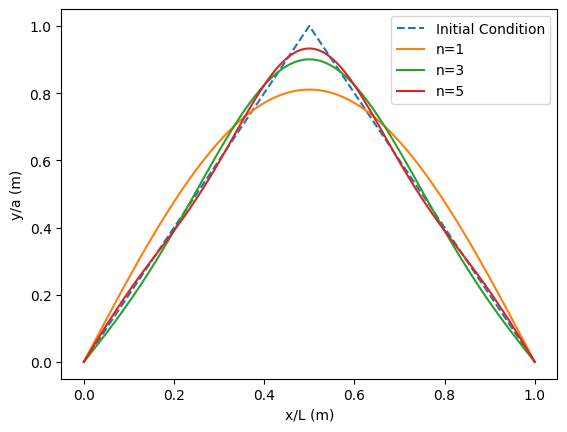

In [70]:
x=np.arange(0,1.01,0.01)

fig, ax = plt.subplots()
ax.plot(x, y_0(x), label="Initial Condition", linestyle="--")
ax.plot(x, y_n0(x,1), label="n=1")
ax.plot(x, y_n0(x,3), label="n=3")
ax.plot(x, y_n0(x,5), label="n=5")

ax.set_xlabel("x/L (m)")
ax.set_ylabel("y/a (m)")

plt.legend()
plt.show()


## Question 4